In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Step 1: Load and Inspect the Dataset**

In [47]:
# Load dataset
df = pd.read_csv('/content/online_courses_uses.csv')

In [48]:
# Display the first few rows of the dataframe
print(df.head())

   Course_ID Course_Name      Category  Duration (hours)  Enrolled_Students  \
0          1    Course_1  Office Tools                21               4217   
1          2    Course_2  Office Tools                57               4238   
2          3    Course_3    Technology                52               2700   
3          4    Course_4  Office Tools                69               4308   
4          5    Course_5    Technology                43               4792   

   Completion_Rate (%)           Platform   Price ($)  Rating (out of 5)  
0            50.646827           Coursera   38.797425           4.811252  
1            82.240240                edX  160.650991           3.829329  
2            55.729028  LinkedIn Learning  123.503781           4.851950  
3            58.664729  LinkedIn Learning  116.775704           3.913732  
4            62.598147              Udemy   96.246696           4.921968  


In [49]:
# Display summary statistics
print(df.describe())

         Course_ID  Duration (hours)  Enrolled_Students  Completion_Rate (%)  \
count  10000.00000      10000.000000       10000.000000         10000.000000   
mean    5000.50000         55.144000        2530.653000            75.119729   
std     2886.89568         26.199242        1423.808243            14.462138   
min        1.00000         10.000000         101.000000            50.008183   
25%     2500.75000         32.000000        1289.000000            62.629516   
50%     5000.50000         55.000000        2532.000000            75.156568   
75%     7500.25000         78.000000        3764.000000            87.595268   
max    10000.00000        100.000000        5000.000000            99.994300   

          Price ($)  Rating (out of 5)  
count  10000.000000       10000.000000  
mean     106.391332           3.994154  
std       55.100685           0.575502  
min       10.037145           3.000026  
25%       58.613731           3.490250  
50%      108.042392           4.0

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB
None


In [51]:
print(df.head())

   Course_ID Course_Name      Category  Duration (hours)  Enrolled_Students  \
0          1    Course_1  Office Tools                21               4217   
1          2    Course_2  Office Tools                57               4238   
2          3    Course_3    Technology                52               2700   
3          4    Course_4  Office Tools                69               4308   
4          5    Course_5    Technology                43               4792   

   Completion_Rate (%)           Platform   Price ($)  Rating (out of 5)  
0            50.646827           Coursera   38.797425           4.811252  
1            82.240240                edX  160.650991           3.829329  
2            55.729028  LinkedIn Learning  123.503781           4.851950  
3            58.664729  LinkedIn Learning  116.775704           3.913732  
4            62.598147              Udemy   96.246696           4.921968  


In [52]:
print(df.tail())

      Course_ID   Course_Name      Category  Duration (hours)  \
9995       9996   Course_9996            AI                87   
9996       9997   Course_9997  Data Science                96   
9997       9998   Course_9998            AI                25   
9998       9999   Course_9999   Programming                46   
9999      10000  Course_10000   Programming                50   

      Enrolled_Students  Completion_Rate (%)           Platform   Price ($)  \
9995                482            55.407463              Udemy  155.965331   
9996               2029            93.093483           Coursera  151.022434   
9997                136            90.279510  LinkedIn Learning  101.155089   
9998               3258            73.720149                edX  101.143232   
9999                257            71.381890              Udemy  125.116906   

      Rating (out of 5)  
9995           4.155649  
9996           4.037755  
9997           3.603868  
9998           3.825781  
9999

In [57]:
# Data types of each column
print(df.dtypes)

Course_ID                int64
Course_Name             object
Category                object
Duration (hours)         int64
Enrolled_Students        int64
Completion_Rate (%)    float64
Platform                object
Price ($)              float64
Rating (out of 5)      float64
dtype: object


In [58]:
print(df.columns)

Index(['Course_ID', 'Course_Name', 'Category', 'Duration (hours)',
       'Enrolled_Students', 'Completion_Rate (%)', 'Platform', 'Price ($)',
       'Rating (out of 5)'],
      dtype='object')


In [59]:
print(df.shape)

(10000, 9)


**Step 2: Exploratory Data Analysis (EDA)**

In [60]:
# Check for missing values
print(df.isnull().sum())

Course_ID              0
Course_Name            0
Category               0
Duration (hours)       0
Enrolled_Students      0
Completion_Rate (%)    0
Platform               0
Price ($)              0
Rating (out of 5)      0
dtype: int64


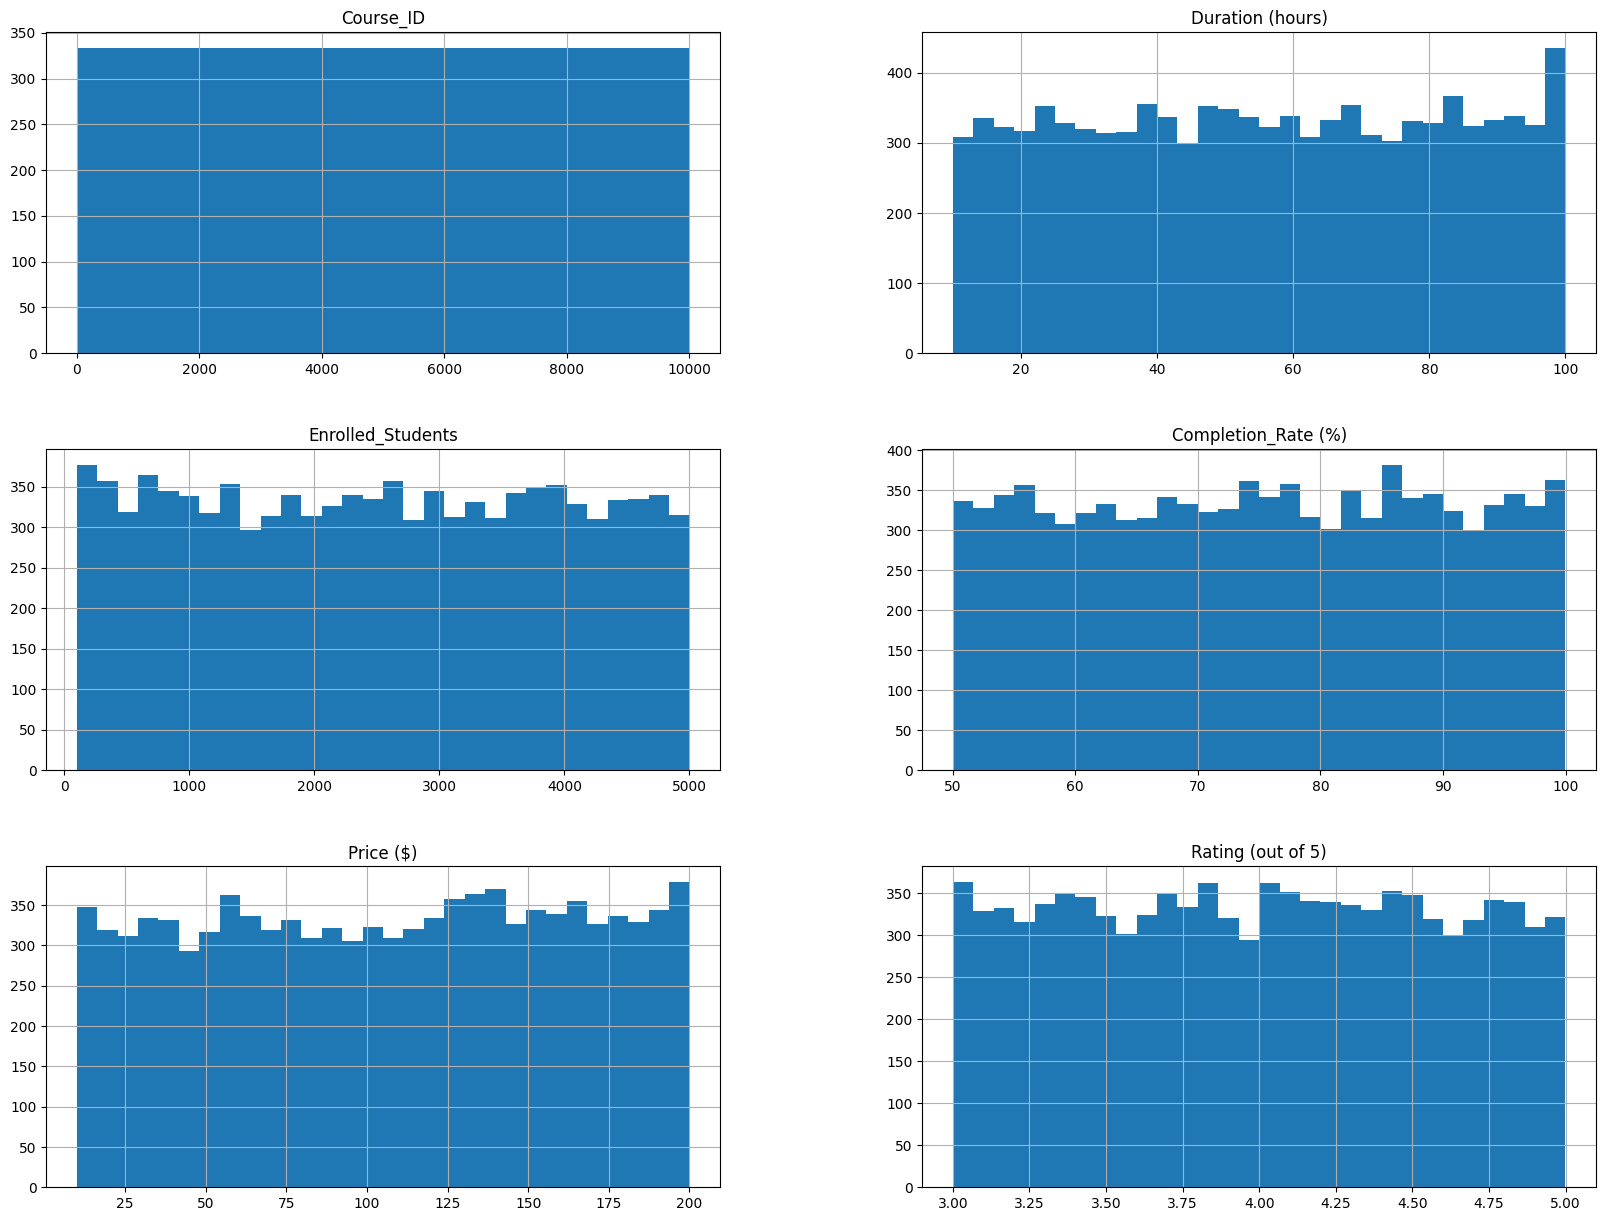

In [61]:
# Plotting histograms for numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

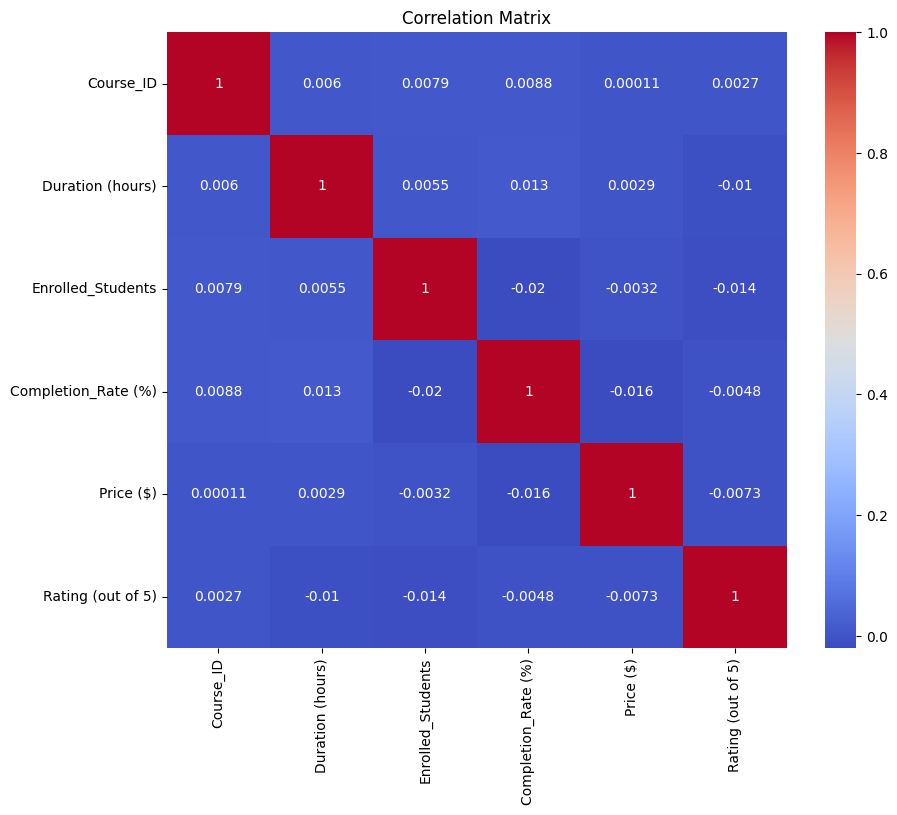

In [63]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Step 3: Data Preprocessing**

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [65]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

In [67]:
# Convert categorical data to numerical data if necessary
df['Platform'] = df['Platform'].astype('category').cat.codes

In [23]:
# Normalize the dataset
# Identify numerical columns again to make sure we capture all changes
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
# Apply scaler only to the numerical columns
scaled_df = scaler.fit_transform(df[numeric_cols])

# If you want a DataFrame back:
scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols)

In [69]:
# Features and target variable
X = df.drop('Platform', axis=1)  # Replace 'target_column' with the actual target column name
y = df['Platform']

In [74]:
# Handle categorical features (like 'Course_ID')
# Check if 'Course_ID' exists in the DataFrame before proceeding
if 'Course_ID' in X.columns:
    X = pd.get_dummies(X, columns=['Course_ID'])  # One-hot encode 'Course_ID' if it exists
else:
    print("Warning: 'Course_ID' column not found in the DataFrame.")

# Check for non-numeric columns after one-hot encoding (if it happened)
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols) # Print any non-numeric columns

# If there are non-numeric columns, handle them appropriately
# For example, you might drop them or convert them to numerical values

# Standardizing the data (only after ensuring all columns are numeric)
# Proceed with scaling if there are no non-numeric columns remaining
if non_numeric_cols.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Warning: Non-numeric columns present. Scaling skipped.")

Non-numeric columns: Index(['Course_Name', 'Category', 'Course_ID_1', 'Course_ID_2', 'Course_ID_3',
       'Course_ID_4', 'Course_ID_5', 'Course_ID_6', 'Course_ID_7',
       'Course_ID_8',
       ...
       'Course_ID_9991', 'Course_ID_9992', 'Course_ID_9993', 'Course_ID_9994',
       'Course_ID_9995', 'Course_ID_9996', 'Course_ID_9997', 'Course_ID_9998',
       'Course_ID_9999', 'Course_ID_10000'],
      dtype='object', length=10002)


In [75]:
# Splitting data into training and testing sets
# Check the column names in your DataFrame
print(scaled_df.columns)

# Verify if 'price' is in the scaled DataFrame
if 'price' in scaled_df.columns:
    X = scaled_df.drop('price', axis=1)
    y = scaled_df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: 'price' column not found in scaled_df. Check previous steps.")

Index(['Course_ID', 'Duration (hours)', 'Enrolled_Students',
       'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)'],
      dtype='object')
Error: 'price' column not found in scaled_df. Check previous steps.


In [79]:
# Handle categorical features (like 'Course_ID')
# ... (rest of the code from ipython-input-74-4cd19300d90c)

# Standardizing the data (only after ensuring all columns are numeric)
# Proceed with scaling if there are no non-numeric columns remaining
if non_numeric_cols.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Make sure this line is executed
else:
    print("Warning: Non-numeric columns present. Scaling skipped.")
    # Handle non-numeric columns here, e.g., drop or encode them
    X = X.drop(columns=non_numeric_cols) # Drop non-numeric columns
    X_scaled = scaler.fit_transform(X) # Scale the data after handling non-numeric columns

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split # Import necessary module
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Step 4: Implementing the Models**

**LSTM**

In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [81]:
# Reshape data for LSTM [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [82]:
# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

In [83]:
# Train the model
history = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 2.1040 - val_loss: 1.3019
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3010 - val_loss: 1.2806
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2841 - val_loss: 1.2702
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2727 - val_loss: 1.2650
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2654 - val_loss: 1.2608
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2583 - val_loss: 1.2551
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2508 - val_loss: 1.2580
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2476 - val_loss: 1.2487
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2439 - val_loss: 1.2475
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2391 - val_loss: 1.2513

In [85]:
# Evaluate the model
lstm_pred = model_lstm.predict(X_test_lstm)
# Convert lstm_pred to a 1D array and y_test to a NumPy array before comparison
lstm_accuracy = np.mean(np.round(lstm_pred.flatten()) == y_test.values)
print(lstm_accuracy)

63/63 [==============================] - 0s 1ms/step
0.253


In [86]:
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")

LSTM Accuracy: 25.30%


**K-Nearest Neighbors (KNN) Model**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [88]:
# Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
# Predict and evaluate the model
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [90]:
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 25.00%


**K-Means Clustering**

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [93]:
# Predicting the clusters
clusters = kmeans.predict(X_scaled)

In [94]:
# Adding the cluster column to the original dataframe
df['Cluster'] = clusters

# Silhouette score to evaluate clustering
silhouette_avg = silhouette_score(X_scaled, clusters)

In [95]:
print(f"K-Means Silhouette Score: {silhouette_avg:.2f}")

K-Means Silhouette Score: 0.14


**Visual Reporting**


In [96]:
import matplotlib.pyplot as plt

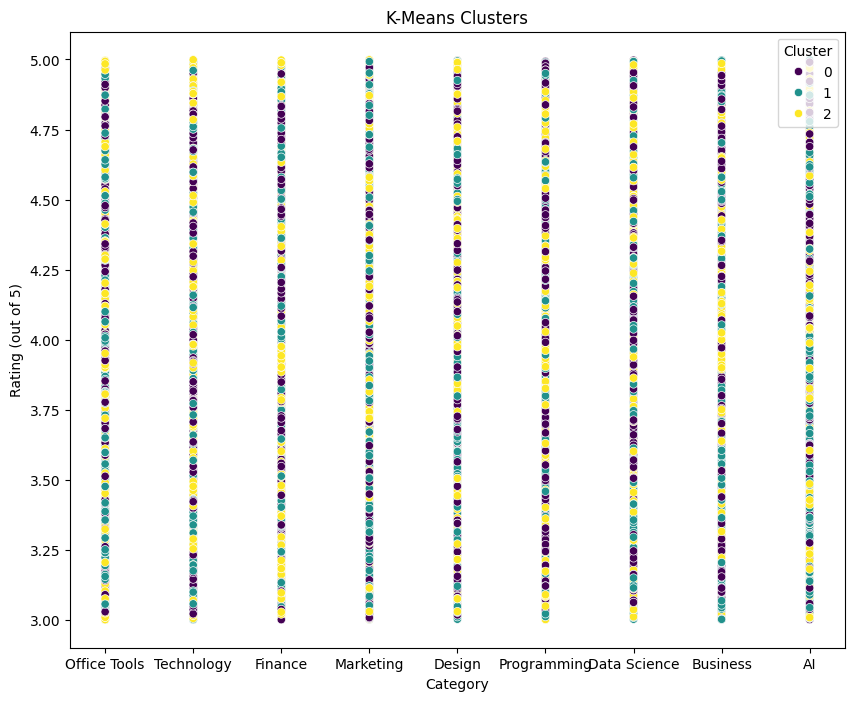

In [98]:
# Visualize KMeans Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Category'], y=df['Rating (out of 5)'], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clusters')
plt.show()

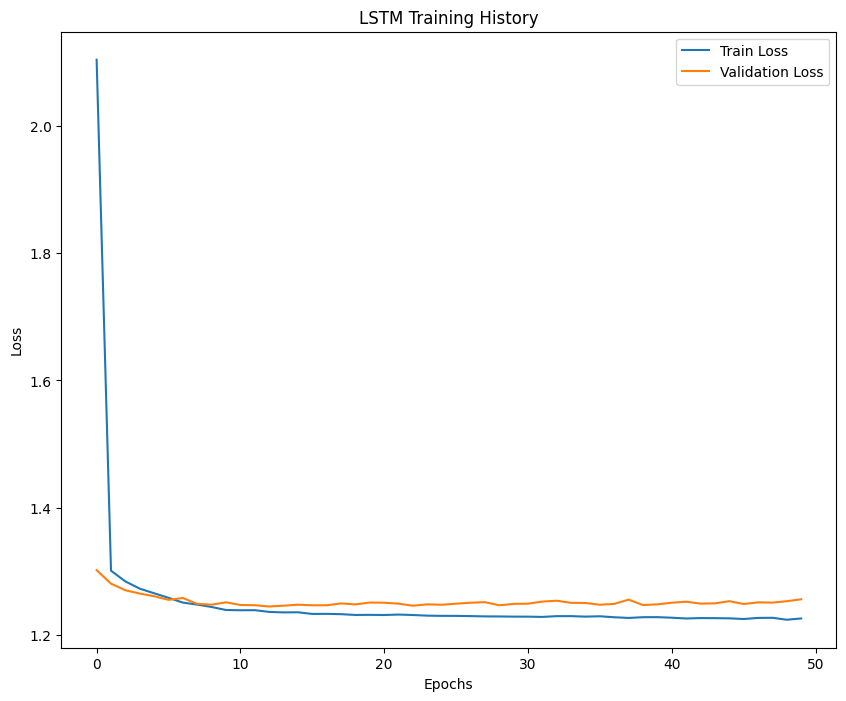

In [99]:
# Plot training history for LSTM
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Analyzing Trends and Comparing Platforms**

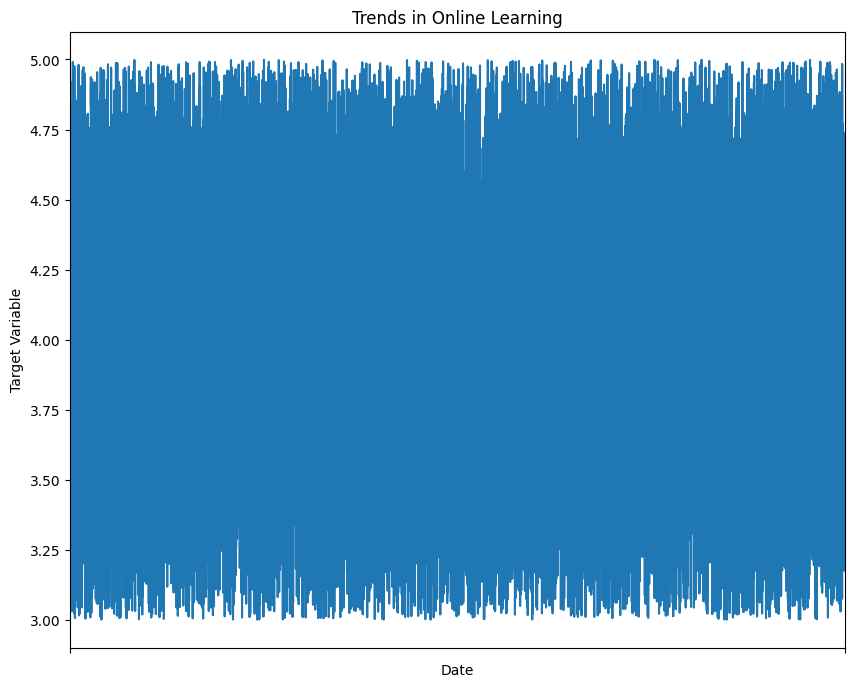

In [104]:
# Example of trend analysis: Time series plot
plt.figure(figsize=(10, 8))
df['Course_ID'] = pd.to_datetime(df['Course_ID'])  # Replace 'date_column' with actual column name
df.set_index('Course_ID', inplace=True)
df['Rating (out of 5)'].plot()
plt.title('Trends in Online Learning')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.show()

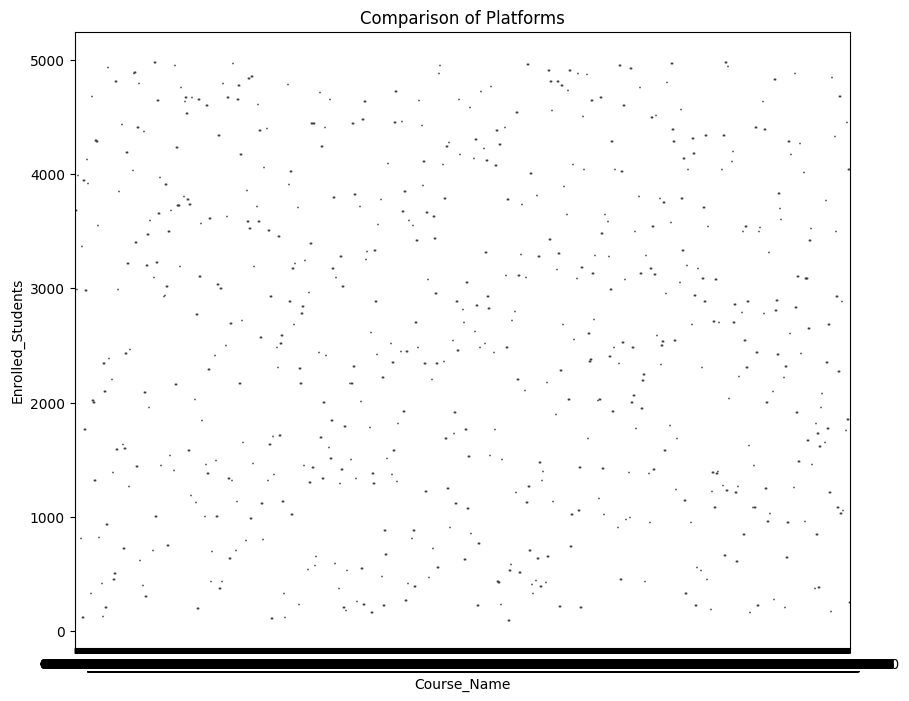

In [105]:
# Example of comparing platforms
plt.figure(figsize=(10, 8))
sns.boxplot(x='Course_Name', y='Enrolled_Students', data=df)  # Replace 'platform_column' and 'target_column' with actual column names
plt.title('Comparison of Platforms')
plt.xlabel('Course_Name')
plt.ylabel('Enrolled_Students')
plt.show()